In [ ]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the dataset from Hugging Face's dataset library
dataset= load_dataset("NotShrirang/email-spam-filter")

# Convert the dataset to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])


README.md:   0%|          | 0.00/113 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/5.40M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5171 [00:00<?, ? examples/s]

In [ ]:
# Check the structure of the dataset
print(dataset['train'].column_names)
# Inspect the first few rows to verify the data structure
print(df.head())


['Unnamed: 0', 'label', 'text', 'label_num']
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\nth...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\n( see a...   
2        3624   ham  Subject: neon retreat\nho ho ho , we ' re arou...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\nthis deal is to ...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'stop_words' is defined earlier in your code, or you can use sklearn's built-in stop words
vectorizer = TfidfVectorizer(stop_words='english')  # You can replace 'english' with your own stop words list

# 'text' is the column with the email content, and 'label' is the column with spam/ham labels
X = vectorizer.fit_transform(df['text'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert 'spam' to 1 and 'ham' to 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9217391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.73      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035



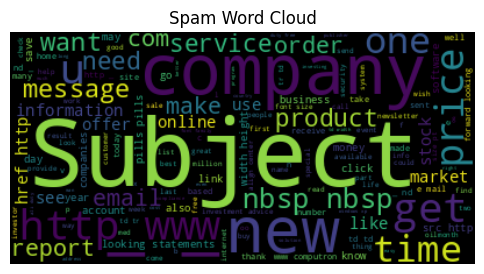

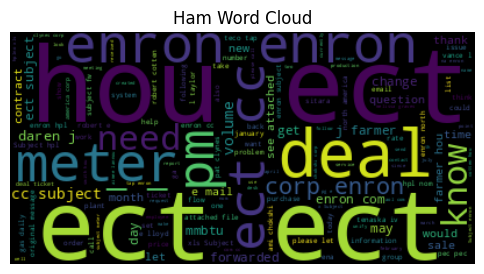

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate spam and ham text based on the correct labels
spam_text = ' '.join(df[df['label'] == 'spam']['text'])  # Corrected label for spam emails
ham_text = ' '.join(df[df['label'] == 'ham']['text'])    # Corrected label for ham emails

# Generate and display word clouds
if len(spam_text) > 0:
    spam_wordcloud = WordCloud(stopwords=stop_words).generate(spam_text)
    plt.figure(figsize=(6, 6))
    plt.imshow(spam_wordcloud, interpolation='bilinear')
    plt.title("Spam Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No spam emails found. Skipping spam word cloud generation.")

if len(ham_text) > 0:
    ham_wordcloud = WordCloud(stopwords=stop_words).generate(ham_text)
    plt.figure(figsize=(6, 6))
    plt.imshow(ham_wordcloud, interpolation='bilinear')
    plt.title("Ham Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No ham emails found. Skipping ham word cloud generation.")


In [ ]:
# Function to preprocess and predict a single email
def classify_email(email_content):
    # Preprocess the email (TF-IDF vectorization)
    email_vectorized = vectorizer.transform([email_content])

    # Predict using the trained model
    prediction = model.predict(email_vectorized)

    # Return the result
    return "Spam" if prediction[0] == 1 else "Ham"

# Input a new email for testing
print("\n--- Email Spam Classification ---")
new_email = input("Enter the email content: ")

# Predict and display the result
result = classify_email(new_email)
print(f"The email is classified as: {result}")


--- Email Spam Classification ---
Enter the email content: Subject: Congratulations! You've won a $1000 gift card!  Dear Winner,  We are thrilled to inform you that you have been selected to receive a $1000 Amazon Gift Card. This is a limited-time offer, and you must claim your prize within 24 hours to avoid forfeiting it.  To claim your gift card, simply click the link below and fill out the required form:  Claim Your Gift Card Now!  This is a one-time offer, so act fast to get your gift card today!  Best regards, The Gift Card Team
The email is classified as: Spam
